<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_science_job.csv')

In [11]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [12]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [13]:
df.shape

(19158, 13)

In [14]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9486,0.624,NaN,Graduate,0.0,32.0
461,0.776,Full time course,Graduate,14.0,52.0
12406,0.926,no_enrollment,Masters,14.0,63.0
13255,0.920,no_enrollment,Graduate,16.0,127.0
18057,0.698,Part time course,NaN,20.0,236.0


In [16]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [17]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

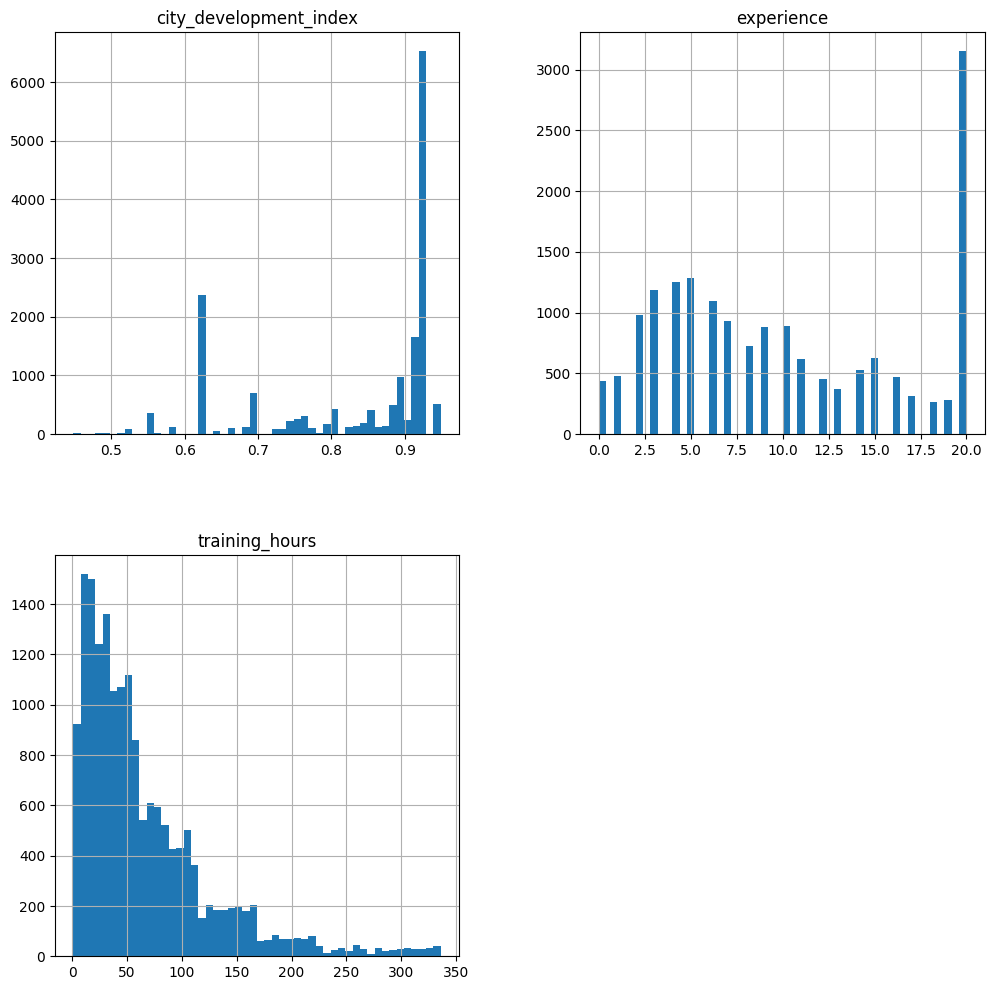

In [18]:
new_df.hist(bins=50, figsize=(12,12))
plt.show()

<Axes: >

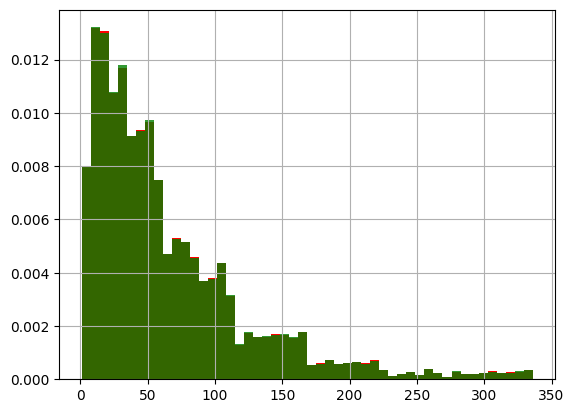

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

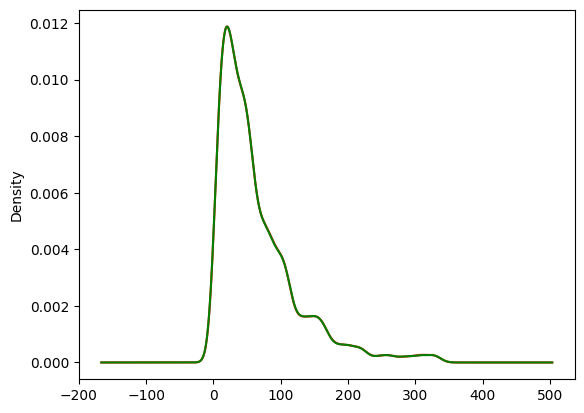

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

<Axes: >

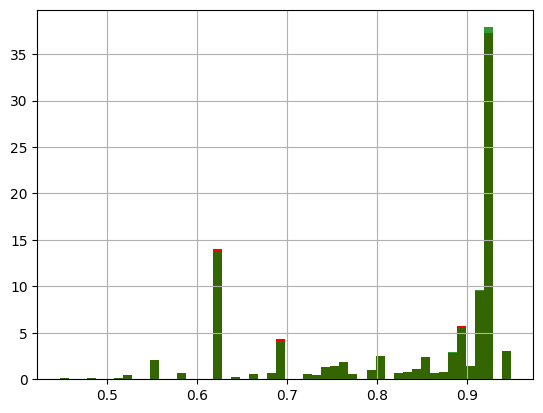

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

new_df['city_development_index'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)


<Axes: ylabel='Density'>

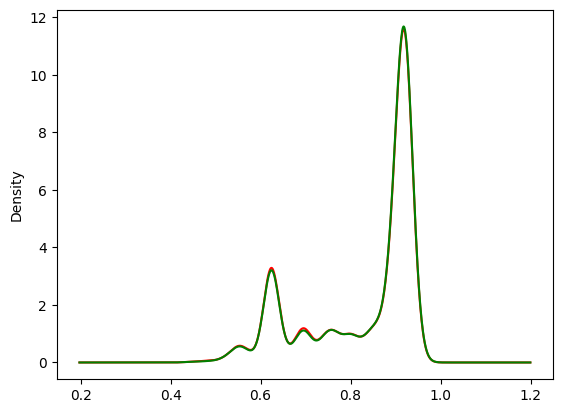

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

<Axes: >

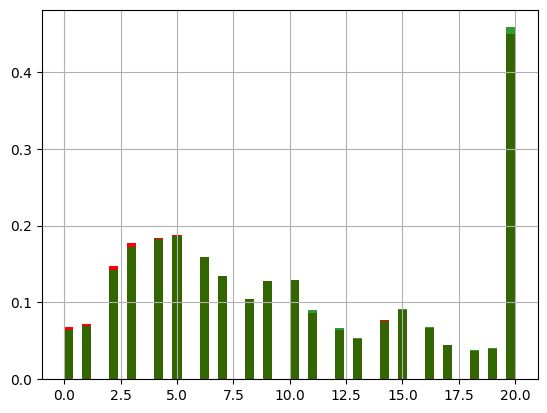

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].hist(bins=50, ax=ax, density=True, color='red')

new_df['experience'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

<Axes: ylabel='Density'>

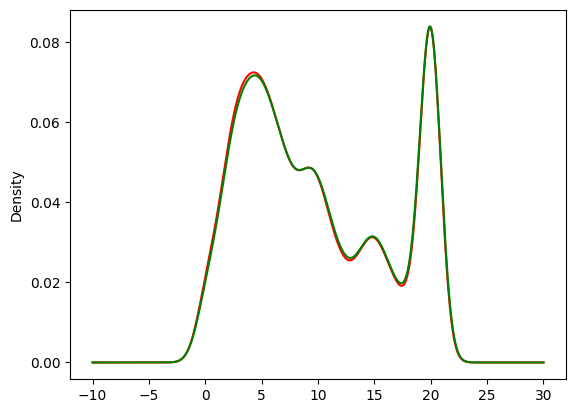

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['experience'].plot.density(color='red')

new_df['experience'].plot.density(color='green')

In [34]:
temp = pd.concat([df['enrolled_university'].value_counts()/len(df),
                  new_df['enrolled_university'].value_counts()/len(new_df) ],
            axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [35]:
temp = pd.concat([df['education_level'].value_counts()/len(df),
                  new_df['education_level'].value_counts()/len(new_df) ],
            axis=1)

temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
